In [4]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui
from sklearn.linear_model import LinearRegression
import numpy as np
import os,sys
from statsmodels.regression import linear_model as sm
import statsmodels.api as sm2
%matplotlib inline
import matplotlib.cm as cm
cmap = cm.tab10
import random
from scipy import signal
import cmath
%load_ext autoreload
%autoreload 2
from scipy.signal import firwin, lfilter, filtfilt
import random

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.path import Path
from matplotlib import patches
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLineCollection
import numpy as np
# questo lo usi se vuoi definire qualche colormap personalizzata, questa per esempio
# va dal blu all'arancione
colors = ["navy", "royalblue", "cornflowerblue", "lightsalmon", "coral", "orangered", "firebrick"]
nodes = [0.0, 1/6, 1/3, 1/2, 2/3, 5/6, 1]
my_cmap = LinearSegmentedColormap.from_list("my_cmap", list(zip(nodes, colors)))

class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import interp1d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from statsmodels.tsa.stattools import acf
aut = acf(sin, nlags = 1000)

NameError: name 'sin' is not defined

In [6]:
def myautocorr(x, maxlag):
    autocorr= [0 for r in range(1,maxlag)]
    # così però non ho diviso in finestre...
    for n in range(1,maxlag):
        autocorr[n-1] = (np.mean(x[n:]* x[:-n])-np.mean(x[n:])*np.mean(x[:-n]))/(np.std(x[:-n])*np.std(x[n:]))
    return np.array([1]+ autocorr)

In [7]:
def myfit(x,y, cutoff,cutoff2):
  x = x[cutoff:cutoff2]
  y = y[cutoff:cutoff2]
  fit = sm.OLS( y,np.vstack((np.ones(len(y)),x)).T).fit()
  print(fit.params[1])
  return fit.params[1], fit.params[0]

In [129]:

import colorednoise as cn
beta = 2 # the exponent
samples = 1000000 # number of samples to generate
brown = cn.powerlaw_psd_gaussian(beta, samples)

beta = 1# the exponent
samples = 1000000 # number of samples to generate
pink = cn.powerlaw_psd_gaussian(beta, samples)# vedere codice di questo modulo

In [9]:
import matplotlib

In [10]:
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 25
pastel= cm.Pastel1(np.linspace(0,1,10))

In [11]:
plt.style.use('ggplot')

In [4]:
def my_moving_window(x, window=3, FUN=np.mean):

    """
    Calculates a moving estimate for a signal

    Args:
      x (numpy.ndarray): a vector array of size N
      window (int): size of the window, must be a positive integer
      FUN (function): the function to apply to the samples in the window
    Returns:
      (numpy.ndarray): a vector array of size N, containing the moving
      average of x, calculated with a window of size window
    """
    if len(x.shape) == 2:
        output = np.zeros(x.shape)
        for rown in range(x.shape[0]):
            output[rown, :] = my_moving_window(x[rown, :],window=window,FUN=FUN)                       
        return output
    output = np.zeros(x.size)
    for samp_i in range(x.size):
        values = []
        # loop through the window:
        for wind_i in range(int(1 - window), 1):
            if ((samp_i + wind_i) < 0) or (samp_i + wind_i) > (x.size - 1):
                # out of range
                continue
            # sample is in range and not nan, use it:
            if not(np.isnan(x[samp_i + wind_i])):
                values += [x[samp_i + wind_i]]
        # calculate the mean in the window for this point in the output:
        output[samp_i] = FUN(values)
    return output


In [43]:
lista = [r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_001.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_002.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_003.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_004.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_005.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_006.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_007.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_008.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_009.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_010.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_011.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_012.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_013.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_014.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_015.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_016.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_017.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_018.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_019.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_020.bin"]

timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

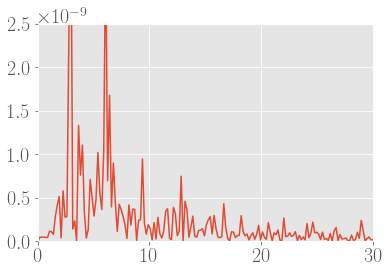

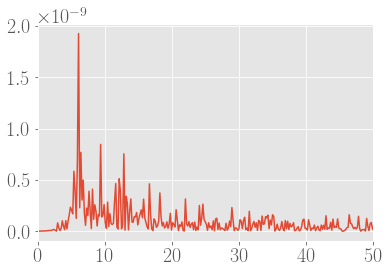

In [229]:
fs = 1/0.001
nqy = fs/2
down = 5/nqy
up = 100/nqy
a,b = signal.butter(2, [down,up], 'bandpass')
x,p = signal.periodogram(timeseries[0,4000:,50], fs = 1/0.001)
plt.plot(x,p)
plt.ylim(0,2.5*10**-9.)
plt.xlim(0,30)
plt.figure()
filtered = signal.filtfilt(a,b,timeseries[0,4000:,50])
x,p = signal.periodogram(filtered[:], fs = 1/0.001)
plt.plot(x,p)
plt.xlim(0,50)

plt.show()

In [87]:
hil = signal.hilbert(timeseries[0,4000:], axis = 0)

In [3]:
phases = np.angle(hil)

NameError: name 'hil' is not defined

In [2]:
phases.shape

NameError: name 'phases' is not defined

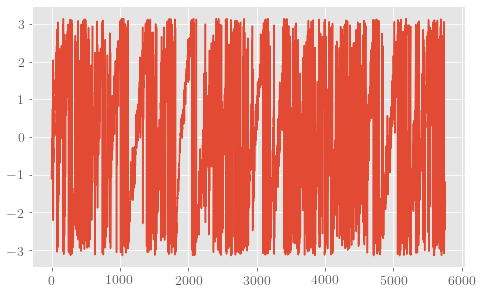

In [24]:
plt.plot(phases[:,180])

In [89]:
mean = my_moving_window(phases[:,180],1)

In [90]:
prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]

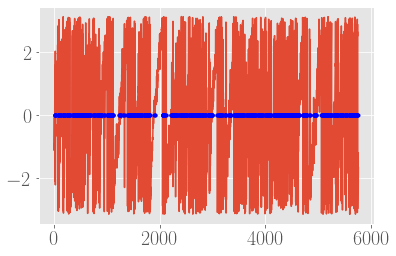

In [91]:
plt.plot(mean)
plt.plot(prova, [0 for r in range(len(prova))], 'b.')
#plt.xlim(2000,2500)

In [92]:
intertempis = prova[1::] -prova[:-1:] # vedere codice di Giacomo

In [104]:
len(intertempis)

993

(500, 493)


Text(0.5, 0, 'n')

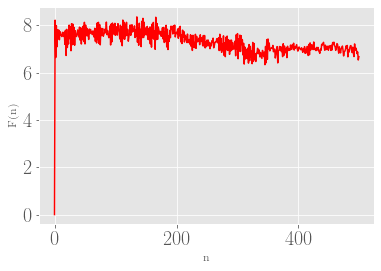

In [107]:
F = []
# diviso in finestre
#i = 0
maxlag = 500
for n in range(0,maxlag):
  F.append([])
  i = 0
  while i + maxlag < len(intertempis):
    dataset = intertempis[i:i+maxlag]
    #print(len(dataset))
    F[n].append(dataset[n]-dataset[0])
    i = i + 1

F = np.array(F)
print(F.shape)

F2 ={}
for r in range(len(F)):
    F2[r] = np.mean(np.abs(F[r]))

plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r-')

plt.ylabel('F(n)')
plt.xlabel('n')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(6,8)


In [70]:
hil = signal.hilbert(timeseries[0,:4000], axis = 0)

In [71]:
phases = np.angle(hil)

In [48]:
phases.shape

(5764, 220)

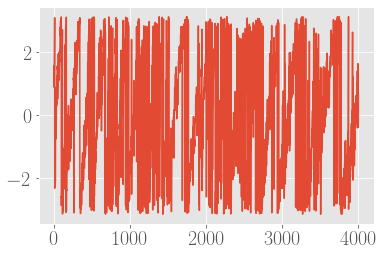

In [72]:
plt.plot(phases[:,180])

In [73]:
mean = my_moving_window(phases[:,180],1)

In [74]:
prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]

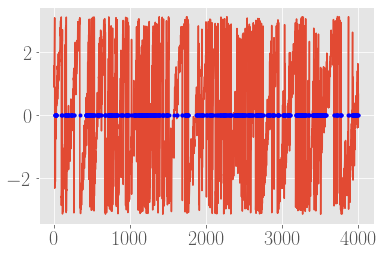

In [75]:
plt.plot(mean)
plt.plot(prova, [0 for r in range(len(prova))], 'b.')
#plt.xlim(2000,2500)

In [76]:
intertempis = prova[1::] -prova[:-1:] # vedere codice di Giacomo

Text(0.5, 0, 'n')

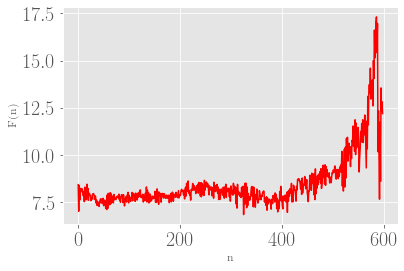

In [80]:
maxlag =600
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:]- intertempis[:-n])))
    
plt.plot(np.arange(0,len(F),1), F,'r-')
plt.ylabel('F(n)')
plt.xlabel('n')

In [83]:
F = []
# diviso in finestre
#i = 0
maxlag = 300
for n in range(0,maxlag):
  F.append([])
  i = 0
  while i + maxlag < len(intertempis):
    dataset = intertempis[i:i+maxlag]
    #print(len(dataset))
    F[n].append(dataset[n]-dataset[0])
    i = i + 1

In [84]:
F = np.array(F)
F.shape

(300, 325)

In [85]:
F2 ={}
for r in range(len(F)):
    F2[r] = np.mean(np.abs(F[r]))

Text(0.5, 0, 'n')

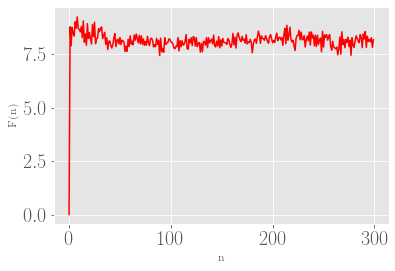

In [86]:
plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r-')

plt.ylabel('F(n)')
plt.xlabel('n')
#plt.xscale('log')
#plt.yscale('log')

In [49]:
prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]

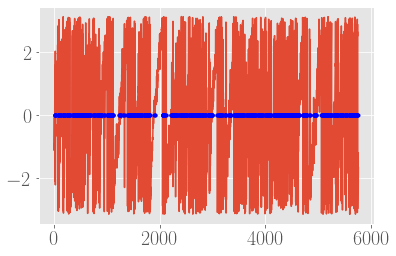

In [50]:
plt.plot(mean)
plt.plot(prova, [0 for r in range(len(prova))], 'b.')
#plt.xlim(2000,2500)

In [51]:
intertempis = prova[1::] -prova[:-1:] # vedere codice di Giacomo

Text(0.5, 0, 'n')

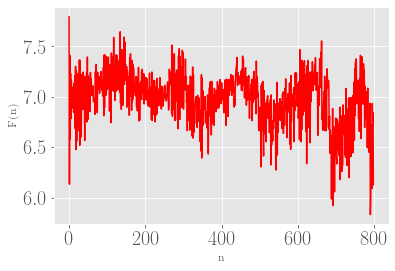

In [56]:
maxlag =800
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:]- intertempis[:-n])))
    
plt.plot(np.arange(0,len(F),1), F,'r-')
plt.ylabel('F(n)')
plt.xlabel('n')

In [ ]:
windows = int(9764/windowlength)

In [223]:
num = 9
windowlength = int(len(prova)/num)
windows = np.array([[i*windowlength,i*windowlength+windowlength] for i in range(num)])

In [213]:
windowlength

25

ValueError: x and y must have same first dimension, but have shapes (16,) and (1,)

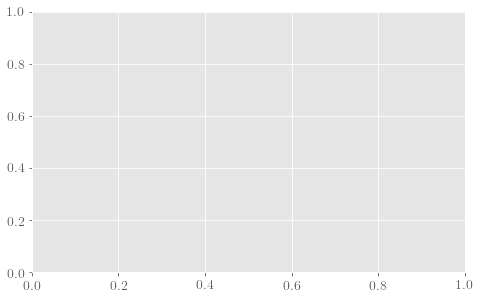

In [201]:
plt.plot(np.arange(0,len(intertempi),1),intertempi, '-')
plt.plot(intertempi[0], 'b.')
plt.plot(200,intertempi[0+200], 'b.')


In [224]:
intertempi = {}

for n in range(1,windowlength):
  intertempi[n-1] = []
  
  for l in range(num):
    dataset = intertempis[windows[l][0]:windows[l][1]]
    intertempi[n-1].append([dataset[n], dataset[0]])
    #np.mean(np.abs(prova[1+window:1+window+100:n] -prova[window:window +100:n] - (prova[window+1:1+window +100:] -prova[window:window +100:])))

In [78]:
intertempi = {}

for n in np.arange(0,400,1):
  l = 0
  intertempi[n] = []
  
  for nprime in range(len(intertempis)):
    
    if nprime + n < len(intertempis):
    
     intertempi[n].append(intertempis[nprime+n]- intertempis[nprime])
     l += 1
  print(l)

993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
938
937
936
935
934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
875
874
873
872
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
850
849
848
847
846
845
844
843
842
841
840
839
838
837
836
835
834
833
832
831
830
829
828
827
826
825
824
823
822
821
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806
805
804
803
802
801
800
799
798
797
796
795
794
793
792
791
790
789
788
787
786
785
784
783
782
781
780
779
778
777
776
775
774
773
772
771
770
769
768
767
766
765
764
763
762
761
760
759
758
757
756
755
754
753
752
751
750
749
748
747
746
745
744


In [66]:
len(intertempi[0])

993

In [80]:
F ={}
for r in intertempi.keys():
    F[r] = np.mean(np.abs(intertempi[r]))

In [225]:
F ={}
for r in intertempi.keys():
    F[r] = np.mean(np.abs(np.array(intertempi[r])[:,1]-np.array(intertempi[r])[:,0]))

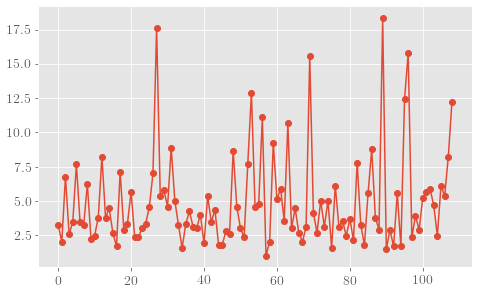

In [226]:
plt.plot(np.arange(0,len(F.values()),1),F.values(), '-o')
#plt.xscale('log')
#plt.yscale('log')

In [227]:
windowlength

110

## Stimolo

In [627]:
hil = signal.hilbert(timeseries[0,6000:], axis = 0)

In [628]:
phases = np.angle(hil)

In [607]:
phases.shape

(2000, 220)

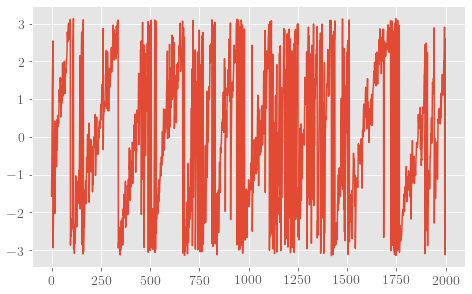

In [608]:
plt.plot(phases[:,180])

In [629]:
mean = phases[:,180]
#my_moving_window(phases[:,180],10)

In [630]:
#mean = mean +5
prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:])) [0]

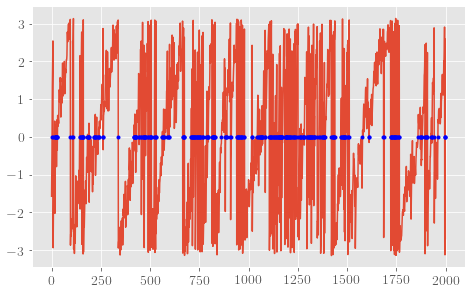

In [622]:
plt.plot(mean)
plt.plot(prova, [0 for r in range(len(prova))], 'b.')
#plt.xlim(2000,2500)

In [631]:
intertempis = prova[1::] -prova[:-1:] # vedere codice di Giacomo

In [613]:
intertempi

{0: [[1, 1],
  [3, 3],
  [2, 2],
  [1, 1],
  [13, 13],
  [31, 31],
  [1, 1],
  [2, 2],
  [1, 1]],
 1: [[3, 1],
  [15, 3],
  [26, 2],
  [12, 1],
  [1, 13],
  [1, 31],
  [2, 1],
  [14, 2],
  [2, 1]],
 2: [[2, 1],
  [1, 3],
  [3, 2],
  [2, 1],
  [2, 13],
  [16, 31],
  [2, 1],
  [2, 2],
  [2, 1]],
 3: [[1, 1], [6, 3], [6, 2], [7, 1], [6, 13], [1, 31], [2, 1], [6, 2], [3, 1]],
 4: [[2, 1],
  [1, 3],
  [3, 2],
  [1, 1],
  [21, 13],
  [2, 31],
  [1, 1],
  [2, 2],
  [1, 1]],
 5: [[2, 1],
  [26, 3],
  [4, 2],
  [3, 1],
  [3, 13],
  [2, 31],
  [2, 1],
  [70, 2],
  [12, 1]],
 6: [[2, 1], [1, 3], [2, 2], [1, 1], [3, 13], [1, 31], [3, 1], [2, 2], [1, 1]],
 7: [[1, 1],
  [42, 3],
  [2, 2],
  [2, 1],
  [16, 13],
  [4, 31],
  [3, 1],
  [2, 2],
  [3, 1]],
 8: [[66, 1],
  [1, 3],
  [2, 2],
  [1, 1],
  [5, 13],
  [4, 31],
  [1, 1],
  [4, 2],
  [2, 1]],
 9: [[11, 1],
  [4, 3],
  [1, 2],
  [6, 1],
  [1, 13],
  [2, 31],
  [4, 1],
  [5, 2],
  [12, 1]],
 10: [[4, 1],
  [2, 3],
  [3, 2],
  [2, 1],
  [12, 13],


In [632]:
num = 9
windowlength = int(len(intertempis)/num)
windows = np.array([[i*windowlength,i*windowlength+windowlength] for i in range(num)])

In [615]:
windowlength

33

In [633]:
intertempi = {}

for n in range(1,windowlength):
  intertempi[n-1] = []
  
  for l in range(num):
    dataset = intertempis[windows[l][0]:windows[l][1]]
    intertempi[n-1].append([dataset[n], dataset[1]])
    #np.mean(np.abs(prova[1+window:1+window+100:n] -prova[window:window +100:n] - (prova[window+1:1+window +100:] -prova[window:window +100:])))

In [617]:
intertempi[10];

In [634]:
Fstim ={}
for r in intertempi.keys():
    Fstim[r] = np.mean(np.abs(np.array(intertempi[r])[:,1]-np.array(intertempi[r])[:,0]))

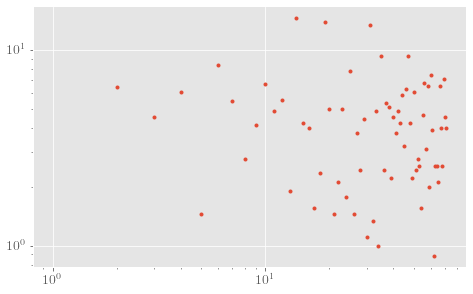

In [636]:
plt.plot(np.arange(1,windowlength),Fstim.values(), '.')
#plt.plot(np.arange(1,100),Fsin.values(), 'b.')

plt.xscale('log')
plt.yscale('log')

# Some control cases


# A pure oscillation

In [263]:
x = np.arange(0.,100000,0.001)
sin = np.sin(2*np.pi*(5)*x[:100000]+ brown[:100000]*10)
#plt.plot(sin)
#plt.xlim(0,10000)

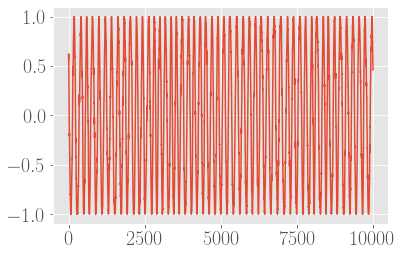

In [264]:
plt.plot(sin[:10000])

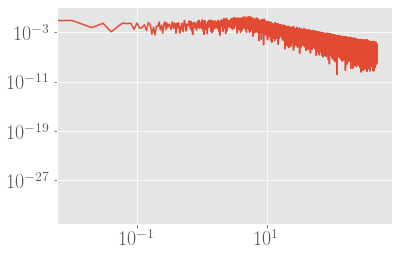

In [222]:
x,pxx = signal.periodogram(sin, fs = 1/0.001)
plt.plot(x,pxx)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(0,20)

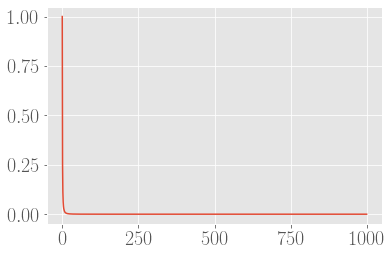

In [27]:
s = [1/x**2 for x in np.arange(1,1000,1)]
plt.plot(s)
f = np.fft.ifft(s)

(199700,)


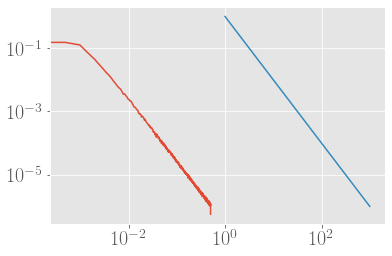

In [80]:
#  genera time series a partire da un certo spettro
# studiare
import numpy as np
from scipy.fftpack import fft, fftshift, ifftshift
from scipy.signal import welch
import pandas as pd
import matplotlib.pyplot as pl



def gen_phase(N):
    if N%2==0:
        raise ValueError('THis methofd requires a symmetric PSD, which can only be achieved with an odd number of data points')
    else:
        phase = np.zeros(N)
        randoms = np.random.random(size=int(N/2))*2*np.pi-np.pi
        phase[:int(N/2)] = randoms
        phase[int(N/2)+1:] = np.flipud(-randoms)
    return phase


def symmetrize_psd(psd):
    N = len(psd)
    symmetric = np.zeros(2*N-1)
    symmetric[0:N] = np.flipud(psd)
    symmetric[N:] = psd[1:]
    return symmetric

def scale_psd(psd, dt):
    N = len(psd)
    phase = gen_phase(N)
    A = np.sqrt(psd/(2*N*dt)) * np.exp(1j*phase)
    return ifftshift(A)

def get_timeseries(A):
    timeseries = np.fft.fft(A)
    return np.real(timeseries)


averages = 200

psd = [1/x**2 for x in np.arange(1,1000,1)]
fi = np.arange(1,1000,1)
sympsd = symmetrize_psd(psd)
N = len(sympsd)
averages = 100
timeseries = np.empty(N*averages)
print(timeseries.shape)
for i in range(averages):
    A = scale_psd(sympsd, 1)
    timeseries[i*N:(i+1)*N] = get_timeseries(A)


f, pxxr = signal.welch(np.real(timeseries), fs=1, nperseg=2**np.floor(np.log2(N)+1))
plt.loglog(f, pxxr)
plt.loglog(fi, psd)
plt.show()

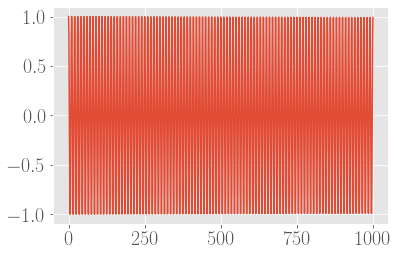

In [58]:
plt.plot(aut)
#plt.xlim(0,8)

In [54]:
windowlength

100

In [59]:
autocorr = []
#i = 0
# autocorr diviso in finestre
maxlag = 100
for n in range(0,maxlag):
  autocorr.append([])
  i = 0
  while i + maxlag < len(sin):
    dataset = sin[i:i+maxlag]
    autocorr[n].append([dataset[n]*dataset[0], dataset[n], dataset[0]])
    i = i + 1
print(i)
    #np.mean(np.abs(prova[1+window:1+window+100:n] -prova[window:window +100:n] - (prova[window+1:1+window +100:] -prova[window:window +100:])))

99900


In [60]:
autocorr = np.array(autocorr)

In [61]:
auto = {}
for g in range(len(autocorr)):
    a,m1,m2 = np.mean(autocorr[g], axis = 0)
    s,s1,s2 = np.std(autocorr[g], axis = 0)
    auto[g] = (a-m1*m2)/(s1*s2)

In [70]:
len(aut)

1001

(900.0, 1000.0)

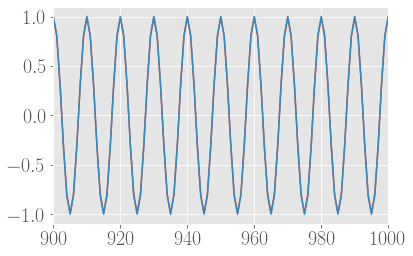

In [72]:
plt.plot(aut)
plt.plot(myautocorr(sin,1001));
plt.xlim(900,1000)

In [265]:


hil = signal.hilbert(sin, axis = 0)
phases = np.angle(hil)
prova = np.where(np.diff(np.sign(phases[:]))!=0)[0]
intertempis = (prova[1:] -prova[:-1]) 
len(intertempis)

1003

f = interp1d(np.arange(0,len(phases),1),phases, kind = 'linear', fill_value = True)
phases2 = f(np.arange(0,len(phases)-10,0.07))
#plt.plot(np.arange(0,len(phases)-10,0.07),f(np.arange(0,len(phases)-10,0.07)), '.')

prova = np.where(np.diff(np.sign(phases2[:]))!=0)[0]
newx = np.arange(0,len(phases)-10,0.07)

In [91]:
np.diff(np.sign(phases[:]))

array([0., 0., 0., ..., 0., 0., 0.])


f = interp1d(np.arange(0,len(phases),1),phases, kind = 'linear', fill_value = True)
plt.plot(phases, 'k.')
plt.plot(np.arange(0,len(phases)-10,0.07),f(np.arange(0,len(phases)-10,0.07)), '.')
#plt.plot(prova+x[:20000], [0 for r in range(len(prova))], 'r.')
plt.plot(prova, [0 for r in range(len(prova))], 'b.') # brown noise su scale più grandi per il seno

#plt.xlim(0,100)

In [139]:
intertempis = (prova[1:] -prova[:-1]) 
new = np.zeros((len(intertempis)+1))
r = 0
i = 0
new[r] = 0
for i in range(1,len(intertempis)):
    new[i] = int(new[i-1] + np.array(intertempis + x[:len(intertempis)])[i])
   

1061

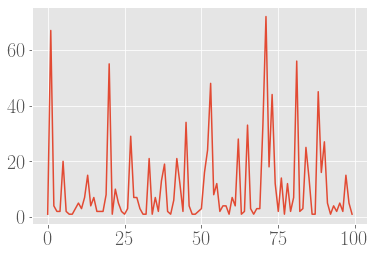

In [233]:
plt.plot(intertempis[:100], '-')

In [230]:
intertempis = (new[1:] -new[:-1]) 
len(intertempis)

NameError: name 'new' is not defined

In [89]:
brownintertempis  = intertempis + brown[:len(intertempis)]

In [151]:
pinkintertempis  = intertempis + pink[:len(intertempis)]

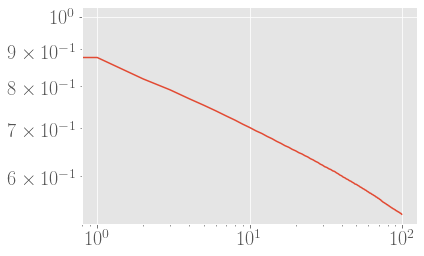

In [142]:
#plt.plot(pinkintertempis)
plt.loglog(myautocorr(pinkintertempis,100))

In [97]:
newtimes =[]
newtimes.append(0)
for l in range(1,len(brownintertempis)+1):
    newtimes.append(newtimes[l-1]+brownintertempis[l-1])
    

In [152]:
newtimespink =[]
newtimespink.append(0)
for l in range(1,len(pinkintertempis)+1):
    newtimespink.append(newtimespink[l-1]+pinkintertempis[l-1])
    

In [153]:
newtimes  = np.array(newtimes)
newtimespink  = np.array(newtimespink)

In [154]:
pinkintertempis, intertempis

(array([ 99.7366724 ,  99.09943119, 101.54368348, ..., 100.27560015,
        100.75538942, 100.17947279]),
 array([100,  99, 101, ..., 100, 100, 100]))

(0.0, 2000.0)

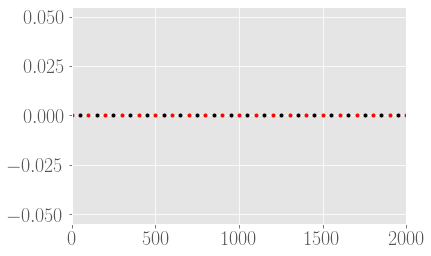

In [156]:
plt.plot(prova[:], [0. for i in range(len(prova))][:],'k.')
#plt.xlim(1000,2000)
#plt.plot(newtimes[:], [0. for i in range(len(newtimes))][:],'.')
plt.plot(newtimespink[:], [0. for i in range(len(newtimespink))][:],'.',color = 'red')

plt.xlim(0,2000)

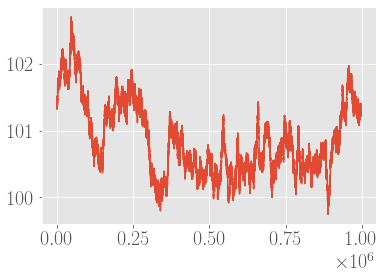

In [128]:
#plt.plot(intertempis)
plt.plot(brownintertempis)

In [121]:
intertempi2 = newtimes[1:]-newtimes[:-1]

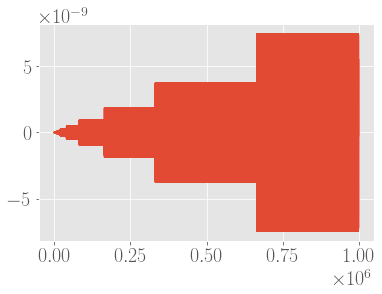

In [115]:
plt.plot((intertempi2-brownintertempis).flatten())

0.08126077874417018


/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(0.08126077874417018, 2.5172816838863548)

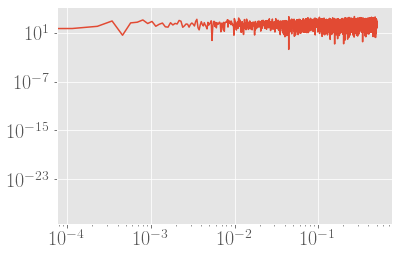

In [241]:
x,Pxx =signal.periodogram(intertempis)
plt.loglog(x,Pxx)
myfit(np.log10(x),np.log10(Pxx),1,len(x))

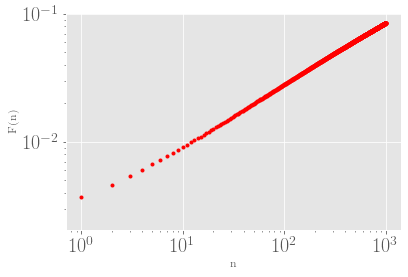

In [268]:
maxlag =1000
#intertempis = intertempis[1000:]
#intertempis = intertempis + x[:len(intertempis)]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(brownintertempis[n:]- brownintertempis[:-n])))
plt.plot(np.arange(0,len(F),1), F,'r.')
plt.ylabel('F(n)')
plt.xlabel('n')

#beta = myfit(np.log10(np.arange(0,len(F),1)), np.log10(F),100,1000)
#plt.plot(np.arange(0,len(F[100:1000]),1), np.arange(0,len(F[100:1000]),1)**beta[0]*10**beta[1], 'b-')

plt.xscale('log')
plt.yscale('log')

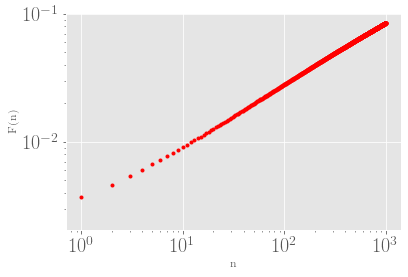

In [116]:
maxlag =1000
#intertempis = intertempis[1000:]
#intertempis = intertempis + x[:len(intertempis)]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempi2[n:]- intertempi2[:-n])))
plt.plot(np.arange(0,len(F),1), F,'r.')
plt.ylabel('F(n)')
plt.xlabel('n')

#beta = myfit(np.log10(np.arange(0,len(F),1)), np.log10(F),100,1000)
#plt.plot(np.arange(0,len(F[100:1000]),1), np.arange(0,len(F[100:1000]),1)**beta[0]*10**beta[1], 'b-')

plt.xscale('log')
plt.yscale('log')

Text(0.5, 0, 'n')

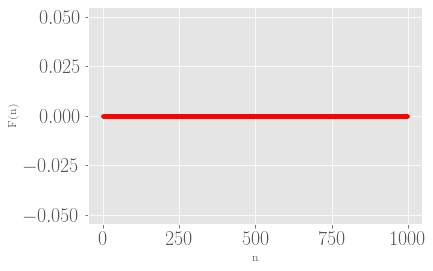

In [86]:
maxlag =1000
#intertempis = intertempis[1000:]
#intertempis = intertempis + x[:len(intertempis)]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:]- intertempis[:-n])))
plt.plot(np.arange(0,len(F),1), F,'r.')
plt.ylabel('F(n)')
plt.xlabel('n')

#beta = myfit(np.log10(np.arange(0,len(F),1)), np.log10(F),100,1000)
#plt.plot(np.arange(0,len(F[100:1000]),1), np.arange(0,len(F[100:1000]),1)**beta[0]*10**beta[1], 'b-')

#plt.xscale('log')
#plt.yscale('log')

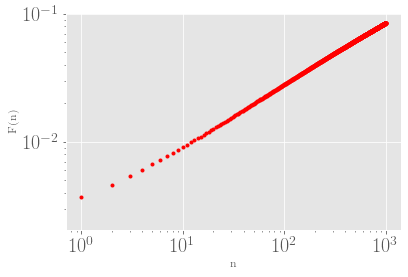

In [91]:
maxlag =1000
#intertempis = intertempis[1000:]
#intertempis = intertempis + x[:len(intertempis)]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(brownintertempis[n:]- brownintertempis[:-n])))
plt.plot(np.arange(0,len(F),1), F,'r.')
plt.ylabel('F(n)')
plt.xlabel('n')

#beta = myfit(np.log10(np.arange(0,len(F),1)), np.log10(F),100,1000)
#plt.plot(np.arange(0,len(F[100:1000]),1), np.arange(0,len(F[100:1000]),1)**beta[0]*10**beta[1], 'b-')

plt.xscale('log')
plt.yscale('log')

Text(0.5, 0, 'n')

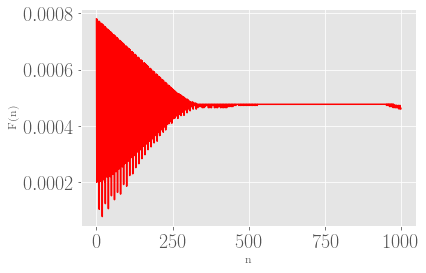

In [77]:
maxlag =1000
#intertempis = intertempis + x[:len(intertempis)]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:]- intertempis[:-n])))
plt.plot(np.arange(0,len(F),1), F,'r-')
plt.ylabel('F(n)')
plt.xlabel('n')

#beta = myfit(np.log10(np.arange(0,len(F),1)), np.log10(F),100,1000)
#plt.plot(np.arange(0,len(F[100:1000]),1), np.arange(0,len(F[100:1000]),1)**beta[0]*10**beta[1], 'b-')

#plt.xscale('log')
#plt.yscale('log')

In [79]:
F = []
# diviso in finestre
#i = 0
maxlag = 10000
for n in range(0,maxlag):
  F.append([])
  i = 0
  while i + maxlag < len(intertempis):
    dataset = intertempis[i:i+maxlag]
    #print(len(dataset))
    F[n].append(dataset[n]-dataset[0])
    i = i + 1

KeyboardInterrupt: 

In [ ]:
F = np.array(F)
F.shape

In [ ]:
F2 ={}
for r in range(len(F)):
    F2[r] = np.mean(np.abs(F[r]))

Text(0.5, 0, 'n')

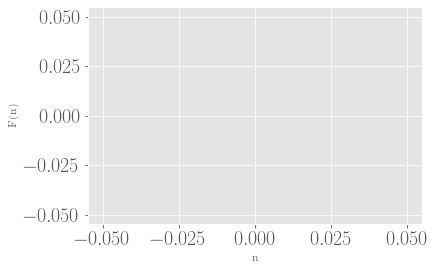

In [70]:
plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r-')

plt.ylabel('F(n)')
plt.xlabel('n')
#plt.xscale('log')
#plt.yscale('log')

In [475]:
fit = sm.OLS( np.log(F1[1:]),np.vstack((np.ones(len(F1[1:])),np.log(np.arange(1,windowlength)[1:]))).T).fit()
#,np.log(F.values()[1:])

In [474]:
F1 = pd.DataFrame(F.values()).values

In [440]:
np.vstack((np.ones(len(F1[1:])),np.log(np.arange(1,windowlength)[1:])));

In [430]:
F1.shape

(242, 1)

# Ornstein Uhlenbeck process 

In [4]:
T = 3000
dt = 0.001
N = int(T/dt)

In [5]:
x = np.zeros(N)
for r in range(N-1):
    x[r+1] = x[r] -x[r]/0.5*dt+np.sqrt(dt)*np.random.normal()

In [32]:
mean = 0
std = 1
num_samples = 100000
x = np.random.normal(mean, std, size=num_samples)

In [36]:
a = myautocorr(x, 100)

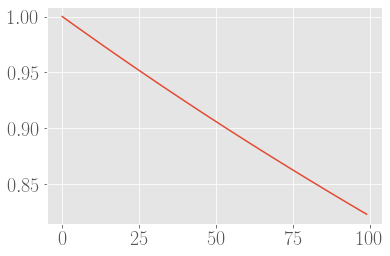

In [37]:
plt.plot(a)

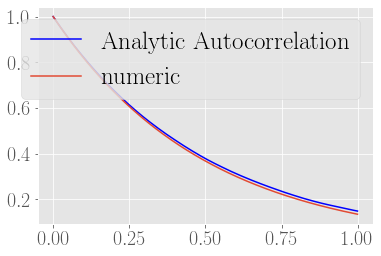

In [172]:
#plt.plot(a)
tau =0.5
plt.plot(np.arange(0,1,.001),a, 'b-', label ='Analytic Autocorrelation')
plt.plot(np.arange(0,1,.001),np.exp(-np.arange(0,1,.001)/tau), label = 'numeric')
plt.legend()

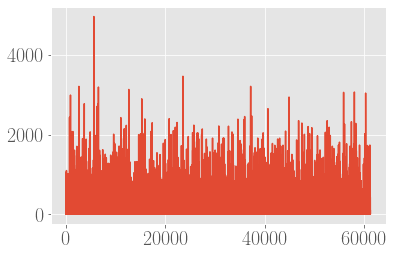

In [103]:
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases[:]
#my_moving_window(phases[:,180],10)

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]


plt.plot(intertempis);
#plt.plot([2500], intertempis[2500], 'bo')
#plt.xlim(2499,2501)
#plt.ylim(0,28)

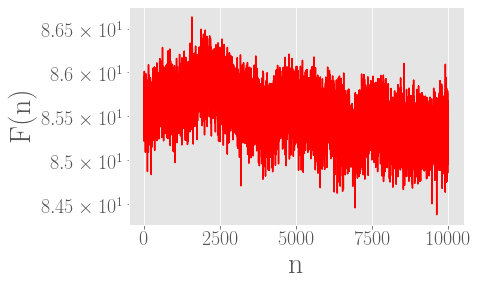

In [105]:
maxlag =10000
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:] - intertempis[:-n])))
    



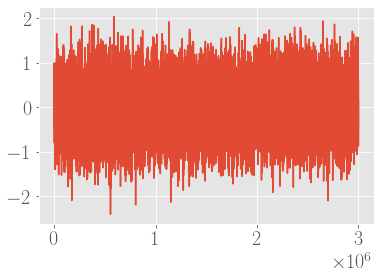

In [8]:
plt.plot(x)

In [9]:
maxlag =1000
x = x[:1000000]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(x[n:] - x[:-n])))


0.4657018535815503


(0.4657018535815503, -1.5449025327287915)

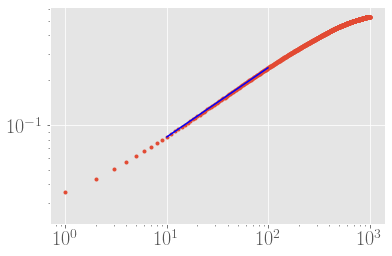

In [32]:
plt.plot(np.arange(0,len(F),1),F, '.')
plt.plot(np.arange(0,len(F),1)[10:100], np.arange(0,len(F),1)[10:100]**beta[0]*10**beta[1], 'b-')
plt.xscale('log')
plt.yscale('log')
beta = myfit(np.log10(np.arange(1,len(F),1)), np.log10(F[1:]),10,100)
beta

0.0599851278594915


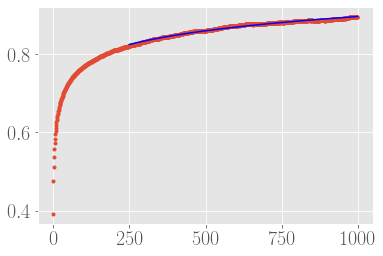

In [42]:


import colorednoise as cn
beta = 1 # the exponent
samples = 1000000 # number of samples to generate
x = cn.powerlaw_psd_gaussian(beta, samples)
maxlag =1000
x = x[:1000000]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(x[n:] - x[:-n])))
    
beta = myfit(np.log10(np.arange(1,len(F),1)), np.log10(F[1:]),250,1000)
beta

plt.plot(np.arange(0,len(F),1),F, '.')
plt.plot(np.arange(0,len(F),1)[250:1000], np.arange(0,len(F),1)[250:1000]**beta[0]*10**beta[1], 'b-')
#plt.xscale('log')
#plt.yscale('log')


Text(0.5, 0, 'n')

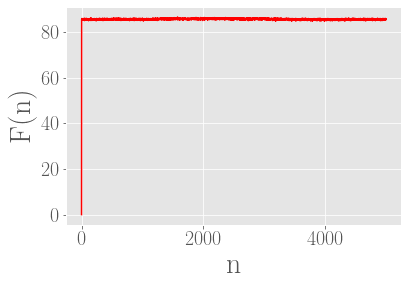

In [108]:
F = []
# diviso in finestre
#i = 0
maxlag = 5000
for n in range(0,maxlag):
  F.append([])
  i = 0
  while i + maxlag < len(intertempis):
    dataset = intertempis[i:i+maxlag]
    #print(len(dataset))
    F[n].append(dataset[n]-dataset[0])
    i = i + 1

F = np.array(F)
F.shape

F2 ={}
for r in range(len(F)):
    F2[r] = np.mean(np.abs(F[r]))

plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r-')

plt.ylabel('F(n)')
plt.xlabel('n')
#plt.xscale('log')
#plt.yscale('log')

(0.0, 2000.0)

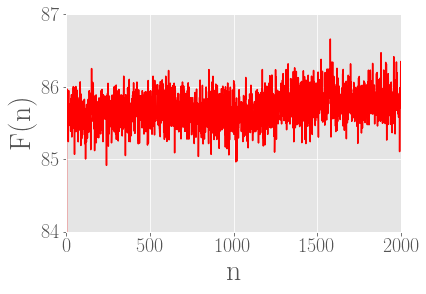

In [113]:
F2 ={}
for r in range(len(F)):
    F2[r] = np.mean(np.abs(F[r]))

plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r-')

plt.ylabel('F(n)')
plt.xlabel('n')
plt.ylim(84,87)
plt.xlim(0,2000)

# 1/f noise

In [5]:
from generate import *

In [ ]:
pwlnoise = power_law_noise(100000000, alpha=1, var=1)

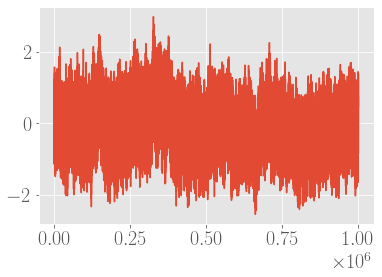

In [30]:
plt.plot(pwlnoise)

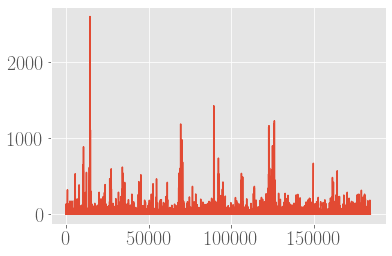

In [43]:
x = pwlnoise
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases[:]
#my_moving_window(phases[:,180],10)

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]


plt.plot(intertempis);
#plt.plot([2500], intertempis[2500], 'bo')
#plt.xlim(2499,2501)
#plt.ylim(0,28)

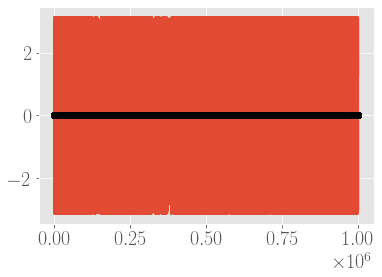

In [34]:
plt.plot(phases)
plt.plot(np.arange(0,len(phases),1)[prova],[0 for i in range(len(prova))], 'ko')
#plt.xlim(0,1000)

In [44]:
maxlag =5000
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:] - intertempis[:-n])))
    

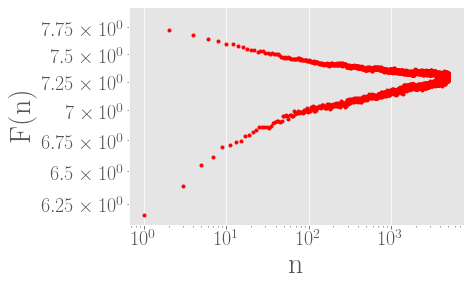

In [46]:
plt.plot(np.arange(0,len(F),1),F, 'r.')
plt.xlabel('n')
plt.ylabel('F(n)');
#plt.xlim(0,200)
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.plot(np.arange(0,len(F),1),F, 'r-')
plt.xlabel('n')
plt.ylabel('F(n)');
#plt.xlim(0,200)
#plt.xscale('log')
#plt.yscale('log')

In [14]:
F = []
# diviso in finestre
#i = 0
maxlag = 5000
for n in range(0,maxlag):
  F.append([])
  i = 0
  while i + maxlag < len(intertempis):
    dataset = intertempis[i:i+maxlag]
    #print(len(dataset))
    F[n].append(dataset[n]-dataset[0])
    i = i + 1

F = np.array(F)
F.shape


(5000, 14265)

Text(0.5, 0, 'n')

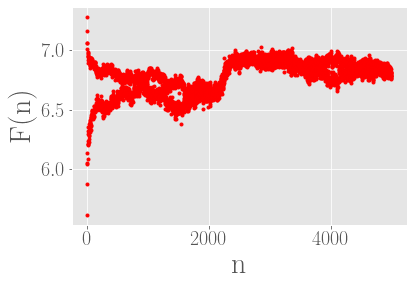

In [26]:

F2 ={}
for r in range(1,len(F)):
    F2[r] = np.mean(np.abs(F[r]))

plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r.')

plt.ylabel('F(n)')
plt.xlabel('n')
#plt.xscale('log')
#plt.yscale('log')

In [241]:
pwlnoise = power_law_noise(1000000, alpha=1, var=1)

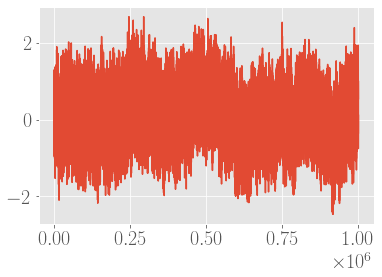

In [230]:
plt.plot(pwlnoise)

In [242]:
x = pwlnoise
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases[:]
#my_moving_window(phases[:,180],10)

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]



/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


1.6682914169487284
Alpha = -0.3341457084743642


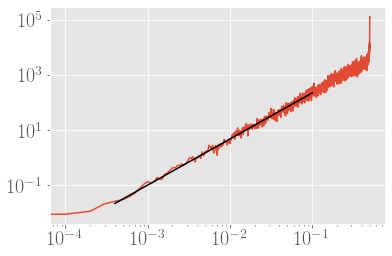

In [292]:
pwlnoise = power_law_noise(1000000, alpha=1, var=1)
x = pwlnoise
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases[:]
#my_moving_window(phases[:,180],10)

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]
k = (intertempis[1:] - intertempis[:-1])

x, P =signal.welch(k,nperseg =10000)
plt.plot(x,P)
cutoff = 4
cutoff2 = 1000
#print(beta[0])
beta = myfit(np.log10(x),np.log10(P),cutoff,cutoff2)
plt.plot(x[cutoff:cutoff2],x[cutoff:cutoff2]**beta[0]*10**beta[1], 'k-')
print(f'Alpha = {(1-beta[0])/2}')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(10**-3,10**7)

In [280]:
df1 = 1

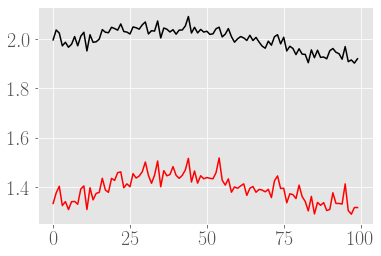

In [268]:
scale = 5000
m,s = [],[]
shape = (intertempis.shape[0]//scale, scale)
X = np.lib.stride_tricks.as_strided(intertempis,shape=shape)
for g in range(len(X)):
    m.append(np.mean(X[g]))
    s.append(np.std(X[g]))
plt.plot(m, 'k')
plt.plot(s,'r')

NameError: name 'myfit' is not defined

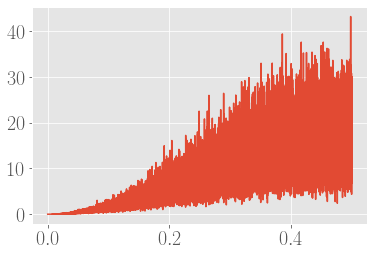

In [37]:
pwlnoise = power_law_noise(1000000, alpha=0.5, var=1)
x = pwlnoise
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases[:]
#my_moving_window(phases[:,180],10)

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]
k = (intertempis[1:] - intertempis[:-1])

x, P =signal.welch(k,nperseg =100000, fs = 1)
plt.plot(x,P)
cutoff = 4
cutoff2 = 1000
#print(beta[0])
beta = myfit(np.log10(x),np.log10(P),cutoff,cutoff2)
plt.plot(x[cutoff:cutoff2],x[cutoff:cutoff2]**beta[0]*10**beta[1], 'k-')
print(f'Alpha = {(1-beta[0])/2}')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10**-3,10**7)

-0.002900287730593039
Alpha = 0.5014501438652965


/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


(0.001, 10000000)

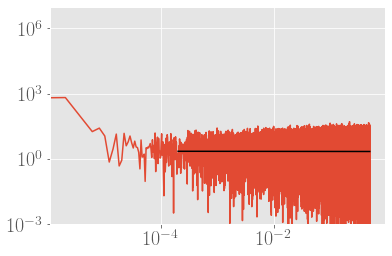

In [239]:
x, P =signal.periodogram(intertempis)
plt.plot(x,P)

#,np.log(F.values()[1:])
cutoff = 100
beta = myfit(np.log10(x),np.log10(P),cutoff)
plt.plot(x[cutoff:],x[cutoff:]**beta[0]*10**beta[1], 'k-')
print(f'Alpha = {(1-beta[0])/2}')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-3,10**7)

In [40]:
maxlag =5000
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:] - intertempis[:-n])))

In [176]:
50*98

4900

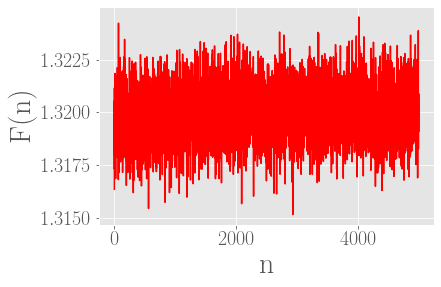

In [41]:
plt.plot(np.arange(0,len(F[:]),1),F[:], 'r-')
plt.xlabel('n')
plt.ylabel('F(n)');
#plt.xlim(0,200)
#plt.xscale('log')
#plt.yscale('log')

In [192]:
fit = sm.OLS( np.log(F[50000:]),np.vstack((np.ones(len(F[50000:])),np.log(np.arange(0,len(F[50000:]),1)+1))).T).fit()
#,np.log(F.values()[1:])

In [193]:
fit.params

array([0.27529077, 0.00097535])

In [180]:
np.reshape(np.array([1,1,2,3]),(4), order = 'C')

array([1, 1, 2, 3])

# Sinus plus some noise

In [6]:
from generate import *

In [175]:
a = myautocorr(x,1000)

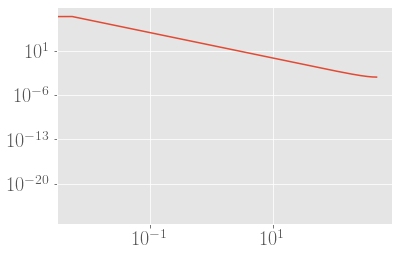

In [183]:
plt.loglog(x,pxx)

-1.9999997670838536


/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(-1.9999997670838536, 4.212831083635346)

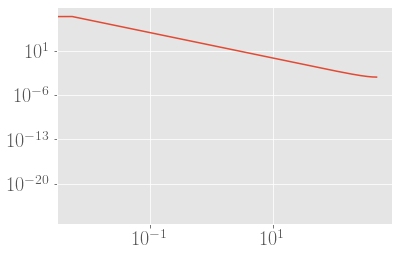

In [181]:
x,pxx = signal.periodogram(x,fs = 1/0.001)
plt.loglog(x,pxx)
myfit(np.log(x),np.log(pxx),1,100)

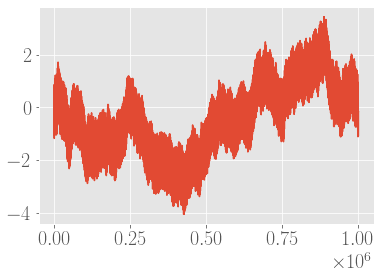

In [199]:
sin = np.sin(2*np.pi*1*np.arange(0,1000,0.001))+y
plt.plot(sin)
#plt.xlim(0,10000)

In [145]:
len(sin)

1000000

-2.0056505645624134


/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


(-2.0056505645624134, -6.4771235913951575)

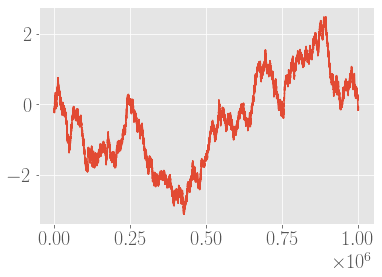

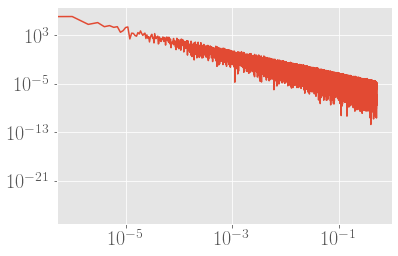

In [195]:


import colorednoise as cn
beta = 2 # the exponent
samples = 1000000 # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)
plt.plot(y)
plt.figure()
x,Pxx = signal.periodogram(y)
plt.loglog(x,Pxx)
myfit(np.log10(x), np.log10(Pxx), 1,10000)

In [200]:
x = sin
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases 
#my_moving_window(phases[:,180],10)


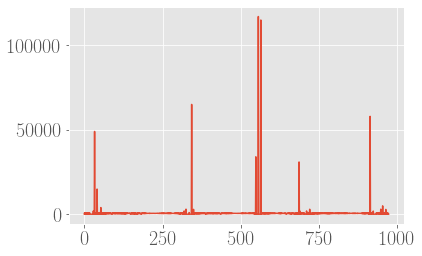

In [201]:

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]

plt.plot(intertempis);
#plt.plot([2500], intertempis[2500], 'bo')
#plt.xlim(2499,2501)
#plt.ylim(0,28)

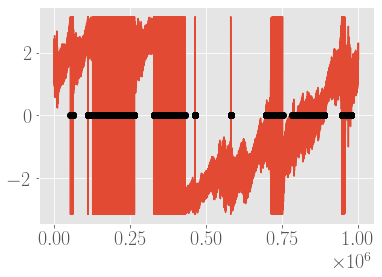

In [202]:
plt.plot(mean, '-')
plt.plot(np.arange(0,len(phases),1)[prova],[0 for i in range(len(prova))], 'ko')
#plt.xlim(5000,6000)

In [203]:
maxlag =5000
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:] - intertempis[:-n])))

/home/benny/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/benny/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


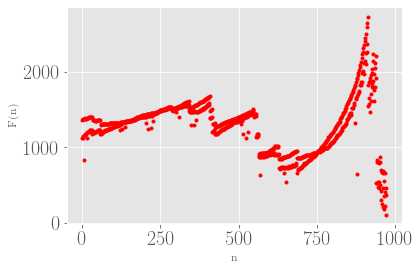

In [204]:
plt.plot(np.arange(0,len(F),1),F, 'r.')
plt.xlabel('n')
plt.ylabel('F(n)');
#plt.ylim(2.3*10,3*10)
#plt.xscale('log')
#plt.yscale('log')

In [ ]:
plt.plot(np.arange(0,len(F),1),F, 'r-')
plt.xlabel('n')
plt.ylabel('F(n)');
#plt.xlim(0,200)
#plt.xscale('log')
#plt.yscale('log')

In [14]:
F = []
# diviso in finestre
#i = 0
maxlag = 5000
for n in range(0,maxlag):
  F.append([])
  i = 0
  while i + maxlag < len(intertempis):
    dataset = intertempis[i:i+maxlag]
    #print(len(dataset))
    F[n].append(dataset[n]-dataset[0])
    i = i + 1

F = np.array(F)
F.shape


(5000, 14265)

Text(0.5, 0, 'n')

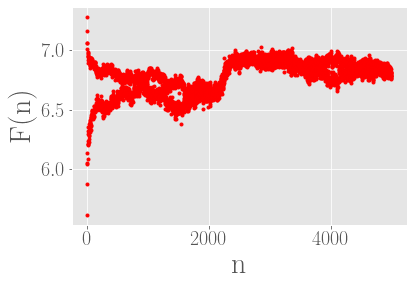

In [26]:

F2 ={}
for r in range(1,len(F)):
    F2[r] = np.mean(np.abs(F[r]))

plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r.')

plt.ylabel('F(n)')
plt.xlabel('n')
#plt.xscale('log')
#plt.yscale('log')

In [241]:
pwlnoise = power_law_noise(1000000, alpha=1, var=1)

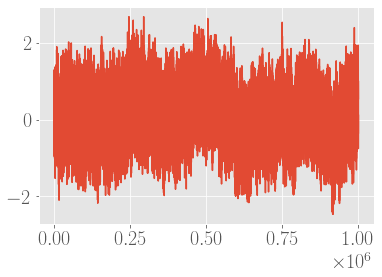

In [230]:
plt.plot(pwlnoise)

In [242]:
x = pwlnoise
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases[:]
#my_moving_window(phases[:,180],10)

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]



/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


1.6682914169487284
Alpha = -0.3341457084743642


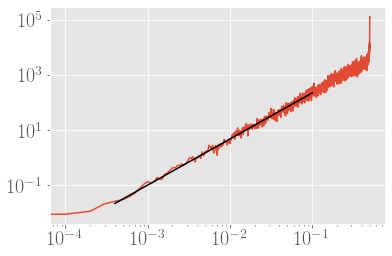

In [292]:
pwlnoise = power_law_noise(1000000, alpha=1, var=1)
x = pwlnoise
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases[:]
#my_moving_window(phases[:,180],10)

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]
k = (intertempis[1:] - intertempis[:-1])

x, P =signal.welch(k,nperseg =10000)
plt.plot(x,P)
cutoff = 4
cutoff2 = 1000
#print(beta[0])
beta = myfit(np.log10(x),np.log10(P),cutoff,cutoff2)
plt.plot(x[cutoff:cutoff2],x[cutoff:cutoff2]**beta[0]*10**beta[1], 'k-')
print(f'Alpha = {(1-beta[0])/2}')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(10**-3,10**7)

In [280]:
df1 = 1

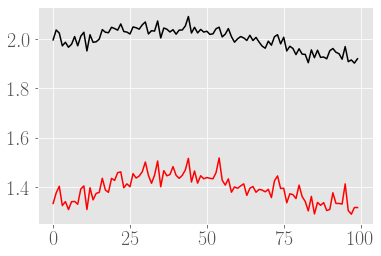

In [268]:
scale = 5000
m,s = [],[]
shape = (intertempis.shape[0]//scale, scale)
X = np.lib.stride_tricks.as_strided(intertempis,shape=shape)
for g in range(len(X)):
    m.append(np.mean(X[g]))
    s.append(np.std(X[g]))
plt.plot(m, 'k')
plt.plot(s,'r')

NameError: name 'myfit' is not defined

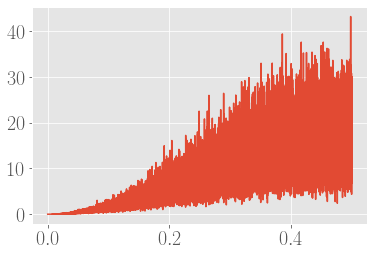

In [37]:
pwlnoise = power_law_noise(1000000, alpha=0.5, var=1)
x = pwlnoise
hil = signal.hilbert(x, axis = 0)

phases = np.angle(hil)


mean = phases[:]
#my_moving_window(phases[:,180],10)

prova = np.where(np.sign(mean[:-1])!= np.sign(mean[1:]))[0]


intertempis = prova[1:] -prova[:-1]
k = (intertempis[1:] - intertempis[:-1])

x, P =signal.welch(k,nperseg =100000, fs = 1)
plt.plot(x,P)
cutoff = 4
cutoff2 = 1000
#print(beta[0])
beta = myfit(np.log10(x),np.log10(P),cutoff,cutoff2)
plt.plot(x[cutoff:cutoff2],x[cutoff:cutoff2]**beta[0]*10**beta[1], 'k-')
print(f'Alpha = {(1-beta[0])/2}')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10**-3,10**7)

-0.002900287730593039
Alpha = 0.5014501438652965


/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


(0.001, 10000000)

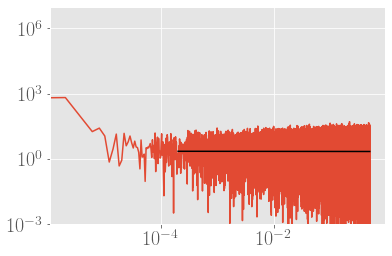

In [239]:
x, P =signal.periodogram(intertempis)
plt.plot(x,P)

#,np.log(F.values()[1:])
cutoff = 100
beta = myfit(np.log10(x),np.log10(P),cutoff)
plt.plot(x[cutoff:],x[cutoff:]**beta[0]*10**beta[1], 'k-')
print(f'Alpha = {(1-beta[0])/2}')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-3,10**7)

In [126]:
def myfit(x,y, cutoff,cutoff2):
  x = x[cutoff:cutoff2]
  y = y[cutoff:cutoff2]
  fit = sm.OLS( y,np.vstack((np.ones(len(y)),x)).T).fit()
  print(fit.params[1])
  return fit.params[1], fit.params[0]

In [40]:
maxlag =5000
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:] - intertempis[:-n])))

In [176]:
50*98

4900

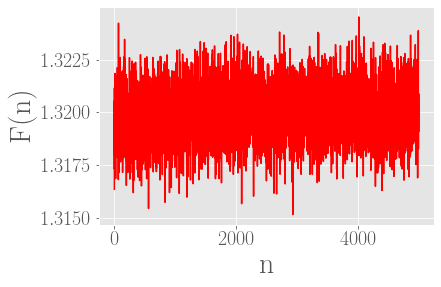

In [41]:
plt.plot(np.arange(0,len(F[:]),1),F[:], 'r-')
plt.xlabel('n')
plt.ylabel('F(n)');
#plt.xlim(0,200)
#plt.xscale('log')
#plt.yscale('log')